### Torchvison transform

In [1]:
import detection_transforms as dt
from data import BedsoreDataset
from utils import draw_bbox
import torch
import random
from torchvision import transforms

In [2]:
# tfmc = Compose([RandomCrop(), ToTensor()])
# tfmc = Compose([])

trans_prob = 0.5
tfmc = dt.Compose([
            dt.RandomCrop(1),
            dt.RandomGaussianBlur((0.1,1),1),
             dt.RandomColorJitter(trans_prob),
            (dt.RandomHorizontalFlip(0.8), dt.RandomVerticalFlip(0.8), dt.RandomRotate(0.8)),
            dt.RandomResize(trans_prob),
            dt.ToTensor(),
            dt.RandomErasing(),
        ])

ds = BedsoreDataset('data', transforms=tfmc)

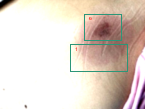

In [17]:
image,target = ds[33]
draw_bbox(image,target)

In [50]:
image,target = ds[1]
W,H = image.size
# _, H,W = image.size()
min_minx = target['boxes'][:,0].min()
min_miny = target['boxes'][:,1].min()
min_maxx = target['boxes'][:,2].max()
min_maxy = target['boxes'][:,3].max()
a = int(random.uniform(0,min_minx))
b = int(random.uniform(0,min_miny))
c = int(random.uniform(min_maxx,W))
d = int(random.uniform(min_maxy,H))
target['boxes'][:,0] -= a
target['boxes'][:,2] -= a
target['boxes'][:,1] -= b
target['boxes'][:,3] -= b

a,b,c,d

TypeError: cannot unpack non-iterable builtin_function_or_method object

In [155]:
image_cropped = image.crop((a,b,c,d))

In [31]:
image_cropped = transforms.ToTensor()(image_cropped)
draw_bbox(image_cropped,target)

NameError: name 'image_cropped' is not defined

### Album

In [1]:
import albumentations as A
from data import BedsoreDataset
from utils import draw_bbox
from torchvision import transforms as T
import numpy as np
from albumentations.pytorch import ToTensorV2,ToTensor
import torch

In [2]:
trans_prob = 0.5
tfmc = None
ds = BedsoreDataset('data', transforms=tfmc)

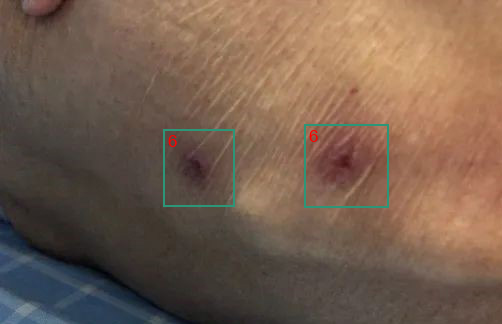

In [203]:
ids = 0
image,target = ds[ids]
draw_bbox(T.ToTensor()(image),target)

In [208]:
atfmc = A.Compose([
    A.RandomScale(p=1),
#     A.RandomShadow(p=1),
#     A.HorizontalFlip(p=1),
#     A.ShiftScaleRotate(p=1),
#     A.RandomBrightnessContrast(p=0.3),
#     A.RGBShift(r_shift_limit=30, g_shift_limit=30, b_shift_limit=30, p=0.3),
    ToTensor(),
    ],bbox_params=A.BboxParams(format='pascal_voc', label_fields=['category_ids']))

image,target = ds[ids]
transformed = atfmc(image=np.array(image), bboxes=target['boxes'], mask=target['masks'].unsqueeze(0).numpy(), category_ids=target['labels'])
target['boxes'] = torch.FloatTensor(transformed['bboxes'])
# target['masks'] = transformed['mask']

# T.ToPILImage()(transformed['image'])
draw_bbox(transformed['image'],target)

error: OpenCV(4.2.0) /io/opencv/modules/imgproc/src/resize.cpp:4048: error: (-215:Assertion failed) inv_scale_x > 0 in function 'resize'


In [207]:
target['masks'].shape, transformed['mask'].shape, transformed['image'].shape

(torch.Size([2, 324, 502]),
 torch.Size([1, 1, 321, 502]),
 torch.Size([3, 321, 498]))